In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

import warnings
warnings.filterwarnings('ignore')

/kaggle/input/electric-vehicle-specifications-dataset-2025/electric_vehicles_spec_2025.csv.csv


## Task 1: Import Libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)

## Task 2: Data Loading and Cleaning

In [3]:
df = pd.read_csv('/kaggle/input/electric-vehicle-specifications-dataset-2025/electric_vehicles_spec_2025.csv.csv')
df.shape

(478, 22)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478 entries, 0 to 477
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   brand                      478 non-null    object 
 1   model                      477 non-null    object 
 2   top_speed_kmh              478 non-null    int64  
 3   battery_capacity_kWh       478 non-null    float64
 4   battery_type               478 non-null    object 
 5   number_of_cells            276 non-null    float64
 6   torque_nm                  471 non-null    float64
 7   efficiency_wh_per_km       478 non-null    int64  
 8   range_km                   478 non-null    int64  
 9   acceleration_0_100_s       478 non-null    float64
 10  fast_charging_power_kw_dc  477 non-null    float64
 11  fast_charge_port           477 non-null    object 
 12  towing_capacity_kg         452 non-null    float64
 13  cargo_volume_l             477 non-null    object 

In [5]:
# Drop source_url
df = df.drop(['source_url'],axis=1)

In [6]:
df.head()

,brand,model,top_speed_kmh,battery_capacity_kWh,battery_type,number_of_cells,torque_nm,efficiency_wh_per_km,range_km,acceleration_0_100_s,fast_charging_power_kw_dc,fast_charge_port,towing_capacity_kg,cargo_volume_l,seats,drivetrain,segment,length_mm,width_mm,height_mm,car_body_type
0,Abarth,500e Convertible,155,37.8,Lithium-ion,192.0,235.0,156,225,7.0,67.0,CCS,0.0,185,4,FWD,B - Compact,3673,1683,1518,Hatchback
1,Abarth,500e Hatchback,155,37.8,Lithium-ion,192.0,235.0,149,225,7.0,67.0,CCS,0.0,185,4,FWD,B - Compact,3673,1683,1518,Hatchback
2,Abarth,600e Scorpionissima,200,50.8,Lithium-ion,102.0,345.0,158,280,5.9,79.0,CCS,0.0,360,5,FWD,JB - Compact,4187,1779,1557,SUV
3,Abarth,600e Turismo,200,50.8,Lithium-ion,102.0,345.0,158,280,6.2,79.0,CCS,0.0,360,5,FWD,JB - Compact,4187,1779,1557,SUV
4,Aiways,U5,150,60.0,Lithium-ion,NaN,310.0,156,315,7.5,78.0,CCS,NaN,496,5,FWD,JC - Medium,4680,1865,1700,SUV


In [7]:
df.isnull().sum()

brand                          0
model                          1
top_speed_kmh                  0
battery_capacity_kWh           0
battery_type                   0
number_of_cells              202
torque_nm                      7
efficiency_wh_per_km           0
range_km                       0
acceleration_0_100_s           0
fast_charging_power_kw_dc      1
fast_charge_port               1
towing_capacity_kg            26
cargo_volume_l                 1
seats                          0
drivetrain                     0
segment                        0
length_mm                      0
width_mm                       0
height_mm                      0
car_body_type                  0
dtype: int64

In [8]:
# Drop number_of_cells
df = df.drop('number_of_cells', axis = 1)

# Drop row with no model
df = df.dropna(subset='model')

# Drop rows with missing categorical data
df = df.dropna(subset = ['cargo_volume_l', 'fast_charge_port'])

# Replace empty numerical values with median
df = df.fillna(df.median(numeric_only = True))

# Show empty values
df.isnull().sum()

brand                        0
model                        0
top_speed_kmh                0
battery_capacity_kWh         0
battery_type                 0
torque_nm                    0
efficiency_wh_per_km         0
range_km                     0
acceleration_0_100_s         0
fast_charging_power_kw_dc    0
fast_charge_port             0
towing_capacity_kg           0
cargo_volume_l               0
seats                        0
drivetrain                   0
segment                      0
length_mm                    0
width_mm                     0
height_mm                    0
car_body_type                0
dtype: int64

## Task 3: EDA

### 3.1: Univaraite Analysis

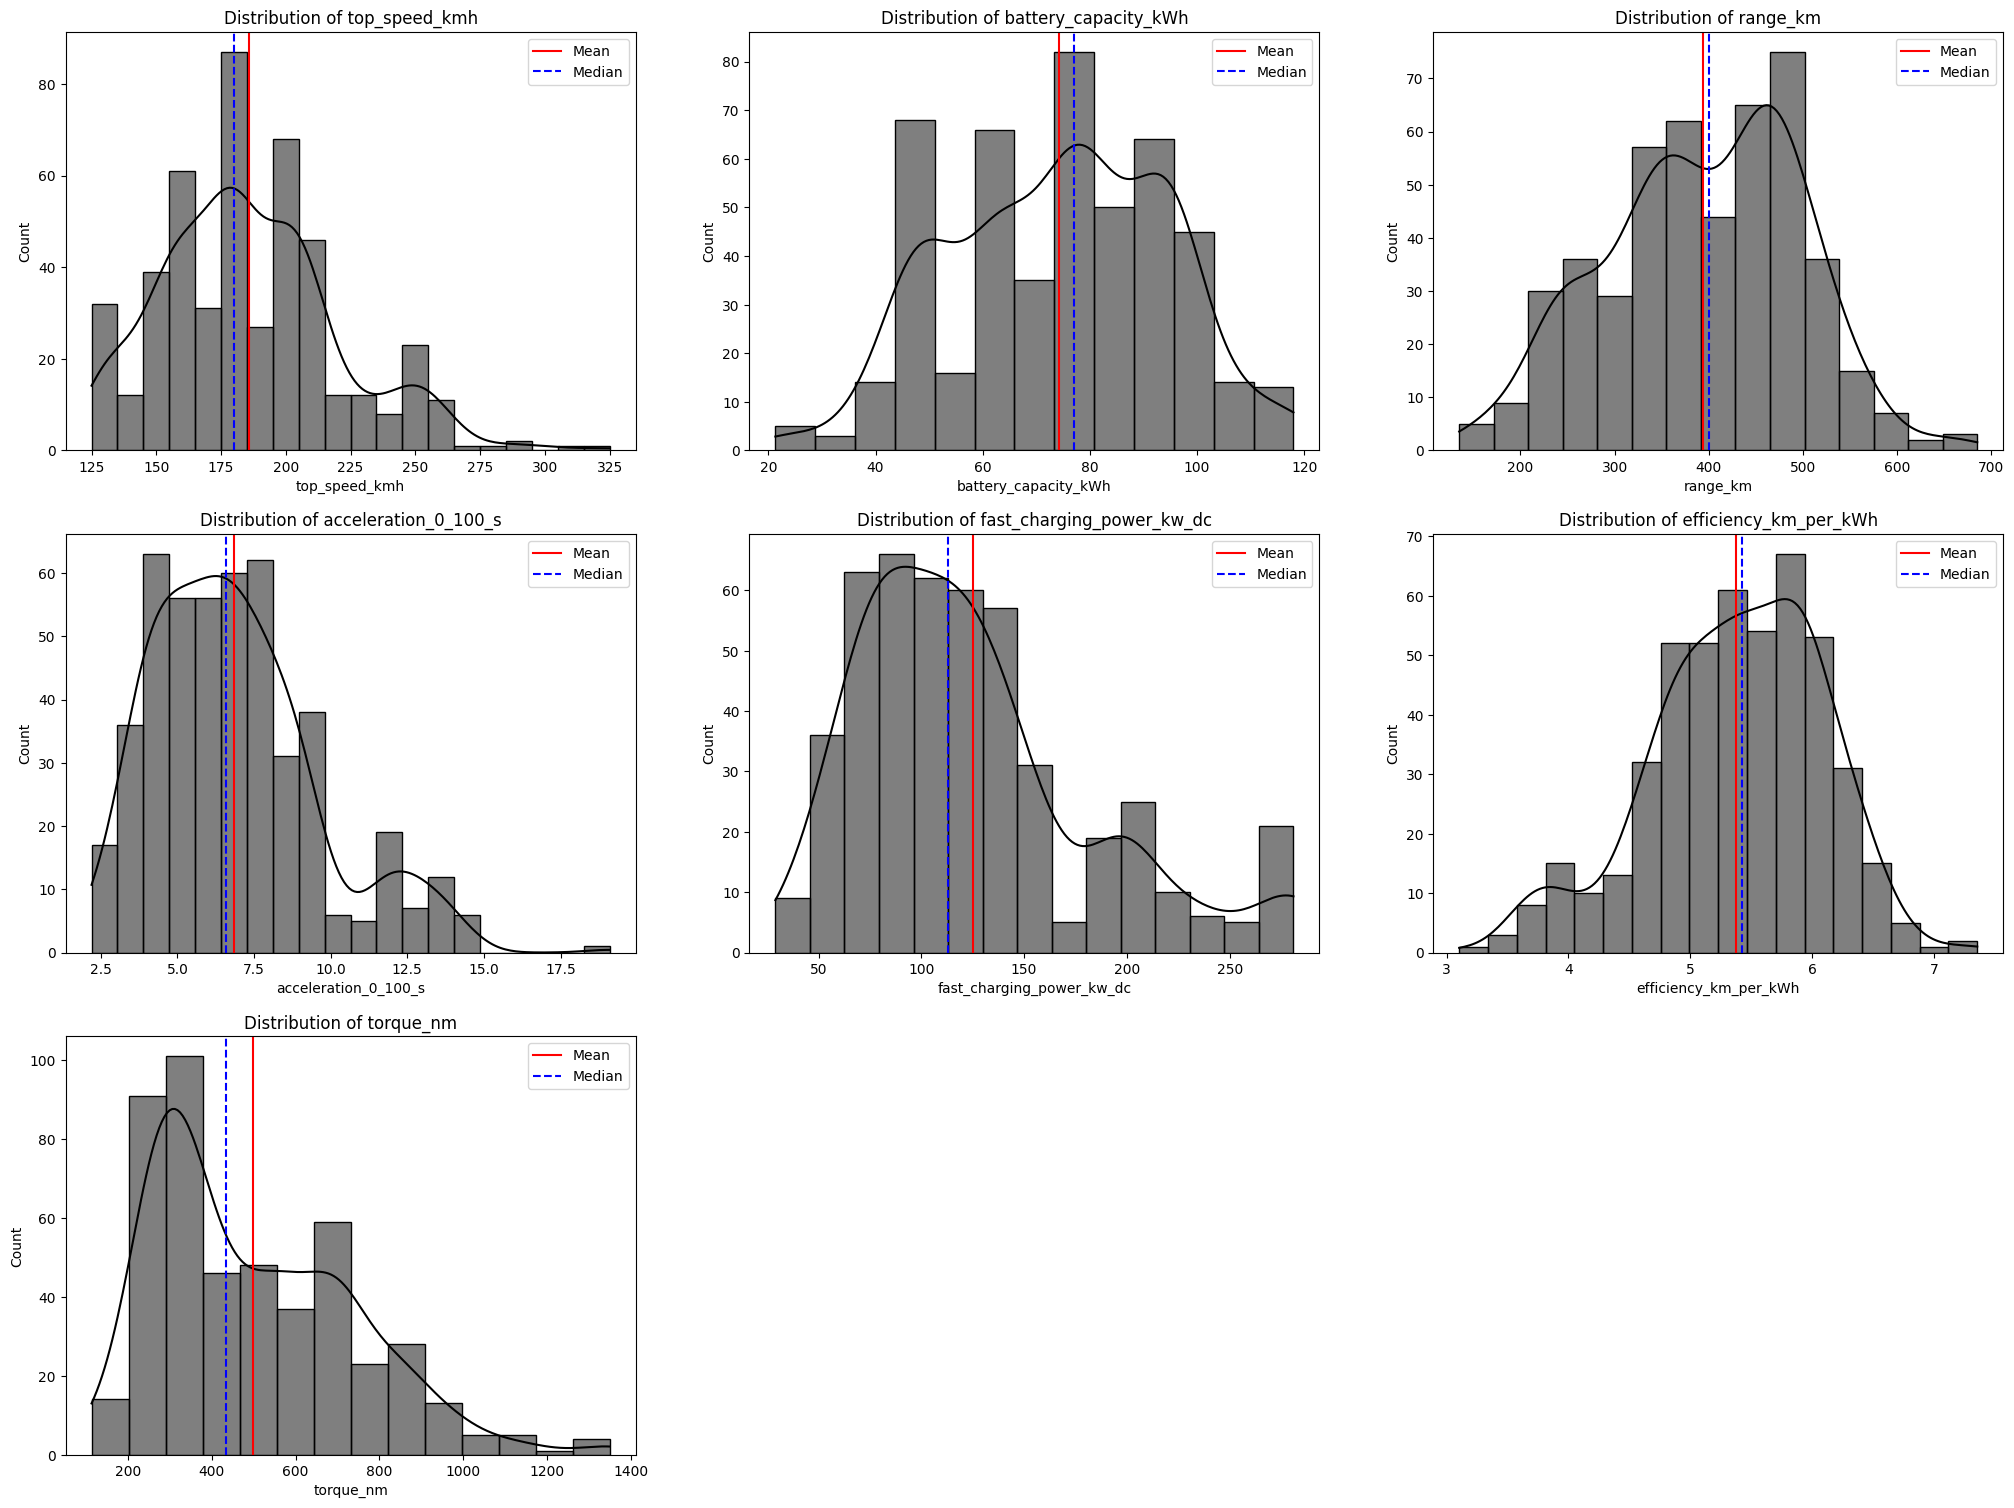

In [9]:
# Numerical Features
df['efficiency_km_per_kWh'] = df['range_km'] / df['battery_capacity_kWh']
num_columns = ['top_speed_kmh', 'battery_capacity_kWh', 'range_km', 'acceleration_0_100_s', 'fast_charging_power_kw_dc','efficiency_km_per_kWh', 'torque_nm']

plt.figure(figsize=(25,25))
for i, feature in enumerate(num_columns, 1):
    plt.subplot(4, 3, i)
    sns.histplot(x = feature, data = df, kde = True, color='black')
    plt.axvline(df[feature].mean(), color='r', linestyle = '-', label= 'Mean')
    plt.axvline(df[feature].median(), color='b', linestyle = '--', label= 'Median')
    plt.title(f'Distribution of {feature}')
    plt.legend()

brand: 58
model: 475
battery_type: 1
fast_charge_port: 2
cargo_volume_l: 140
drivetrain: 3
segment: 15
car_body_type: 8


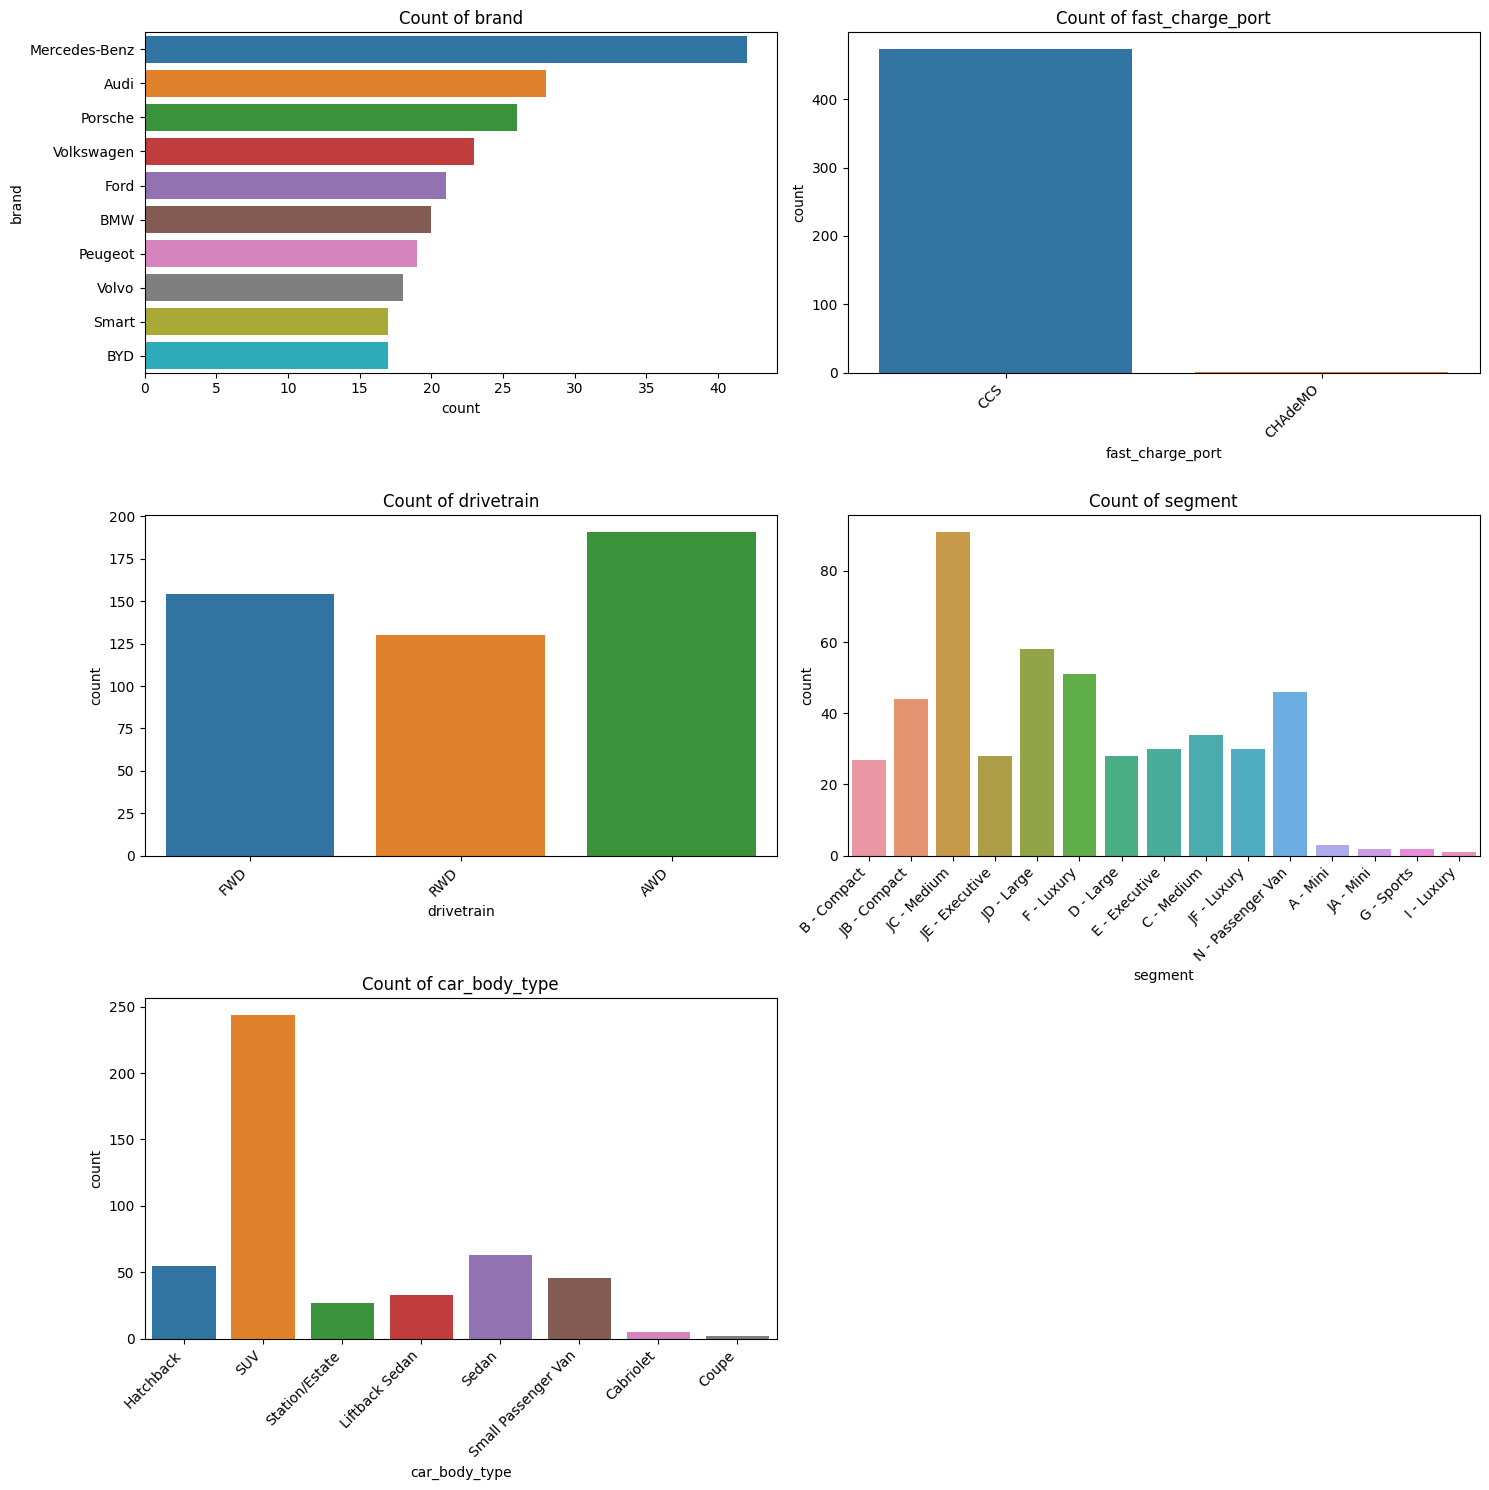

In [10]:
# Categorical Features
cat_features = df.select_dtypes(include= 'object').columns

for feature in cat_features:
    num_values = df[feature].nunique()
    print(f'{feature}: {num_values}')

# Update categorical features for better visualization 
cat_features = ['brand', 'fast_charge_port', 'drivetrain', 'segment', 'car_body_type']

top_n = 10
plt.figure(figsize=(15,15))
for i, feature in enumerate(cat_features, 1):
    plt.subplot(3, 2, i)
    if feature == 'brand':
        value_counts = df[feature].value_counts().nlargest(top_n).index
        sns.countplot(data = df[df['brand'].isin(value_counts)], y = feature, order = value_counts)
    else:
        sns.countplot(data = df, x = feature)
        plt.xticks(rotation=45, ha='right', fontsize=10)
    plt.tight_layout()
    plt.title(f'Count of {feature}')

### Task 3.2: Bivariate Analysis

Text(0.5, 1.0, 'Correlation Matrix of Numerical Features')

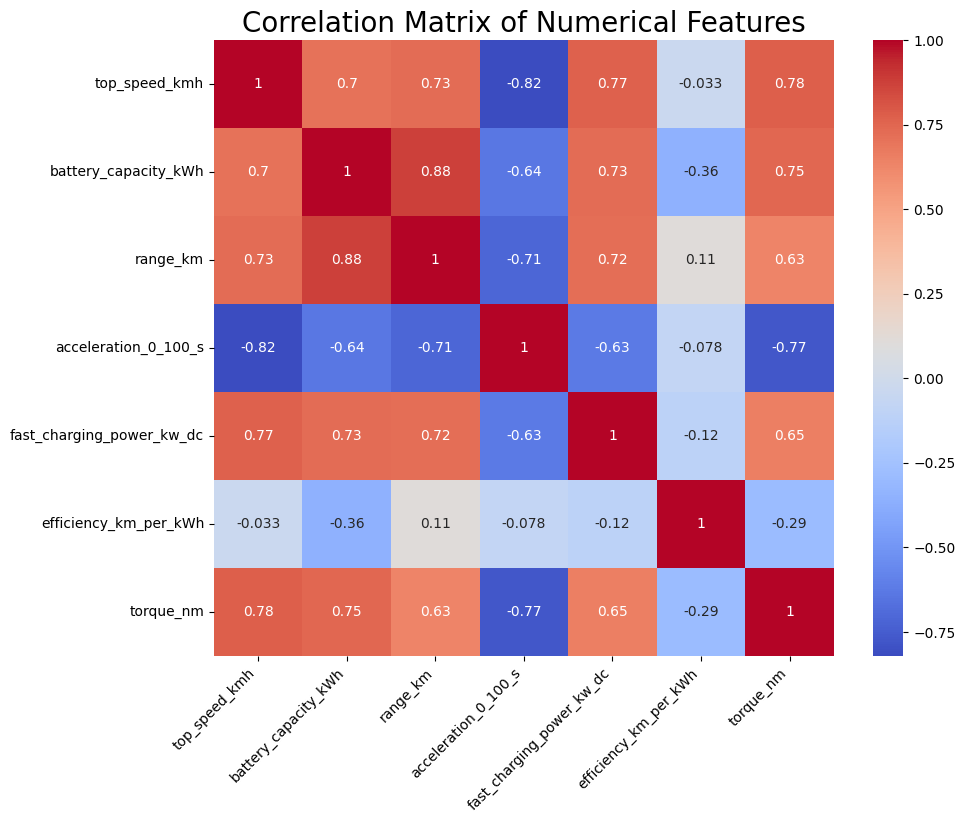

In [11]:
# Plot correlation matrix of numerical values
df_corr = df[num_columns].corr(numeric_only = True)
plt.figure(figsize=(10,8))
sns.heatmap(df_corr, annot=True, cmap='coolwarm')
plt.xticks(rotation=45, ha='right')
plt.title('Correlation Matrix of Numerical Features', fontsize=20)

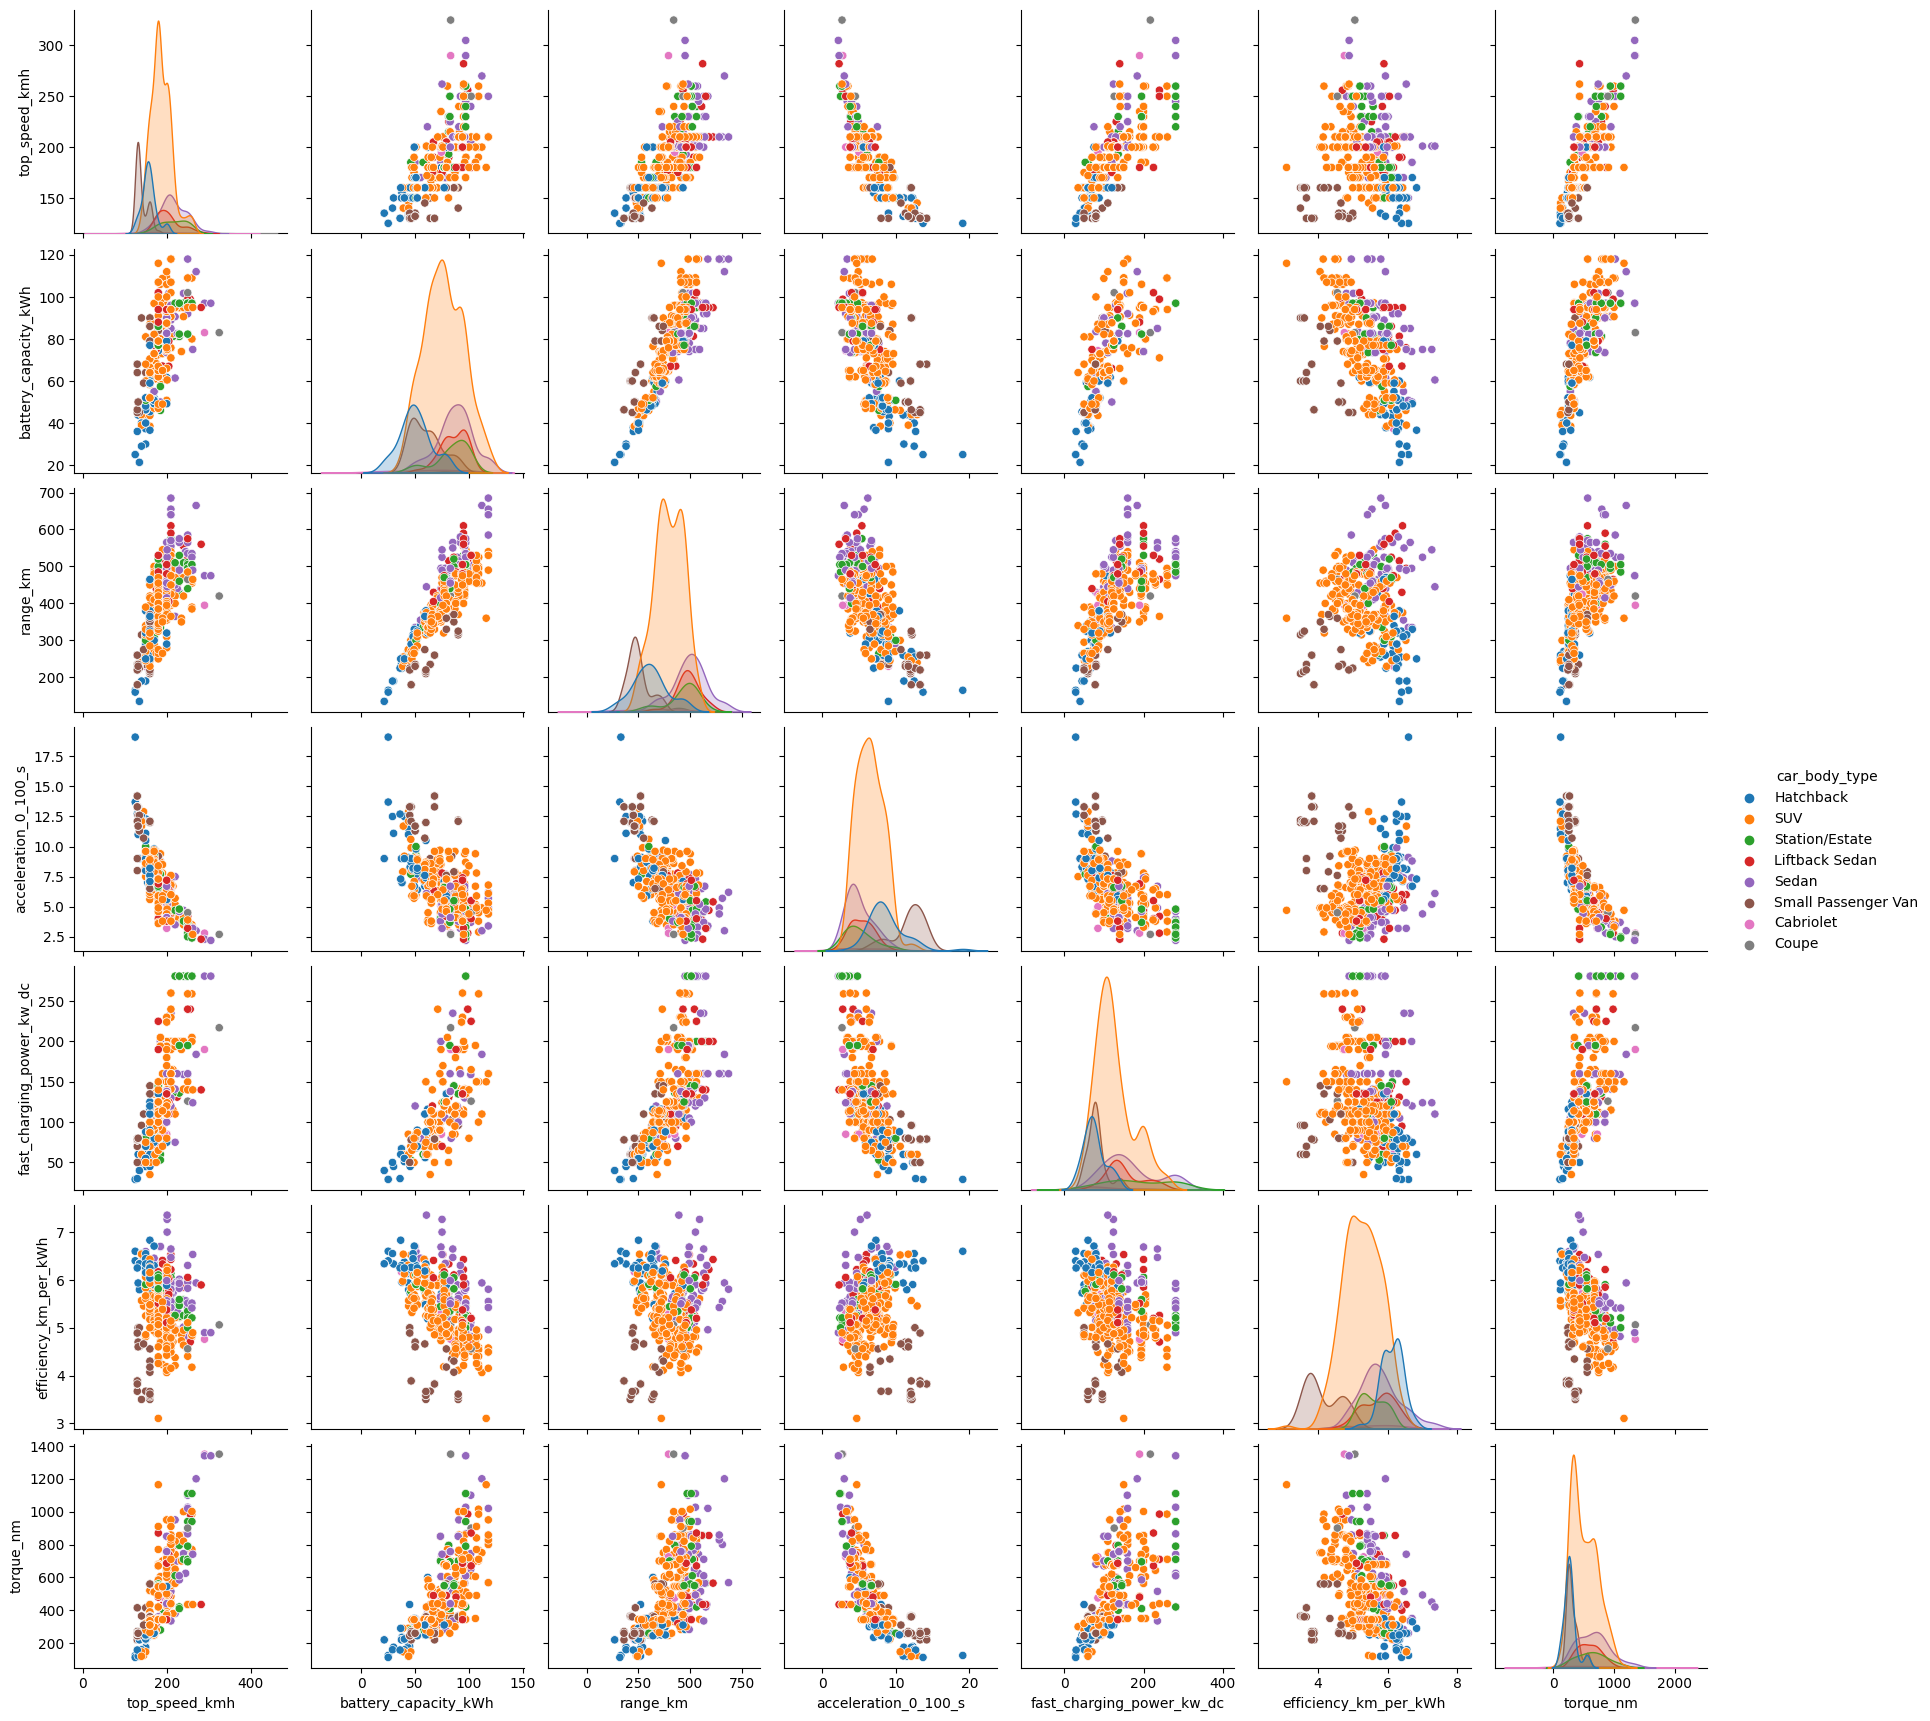

In [12]:
sns.pairplot(data= df[num_columns + ['car_body_type']], diag_kind='kde', hue='car_body_type')

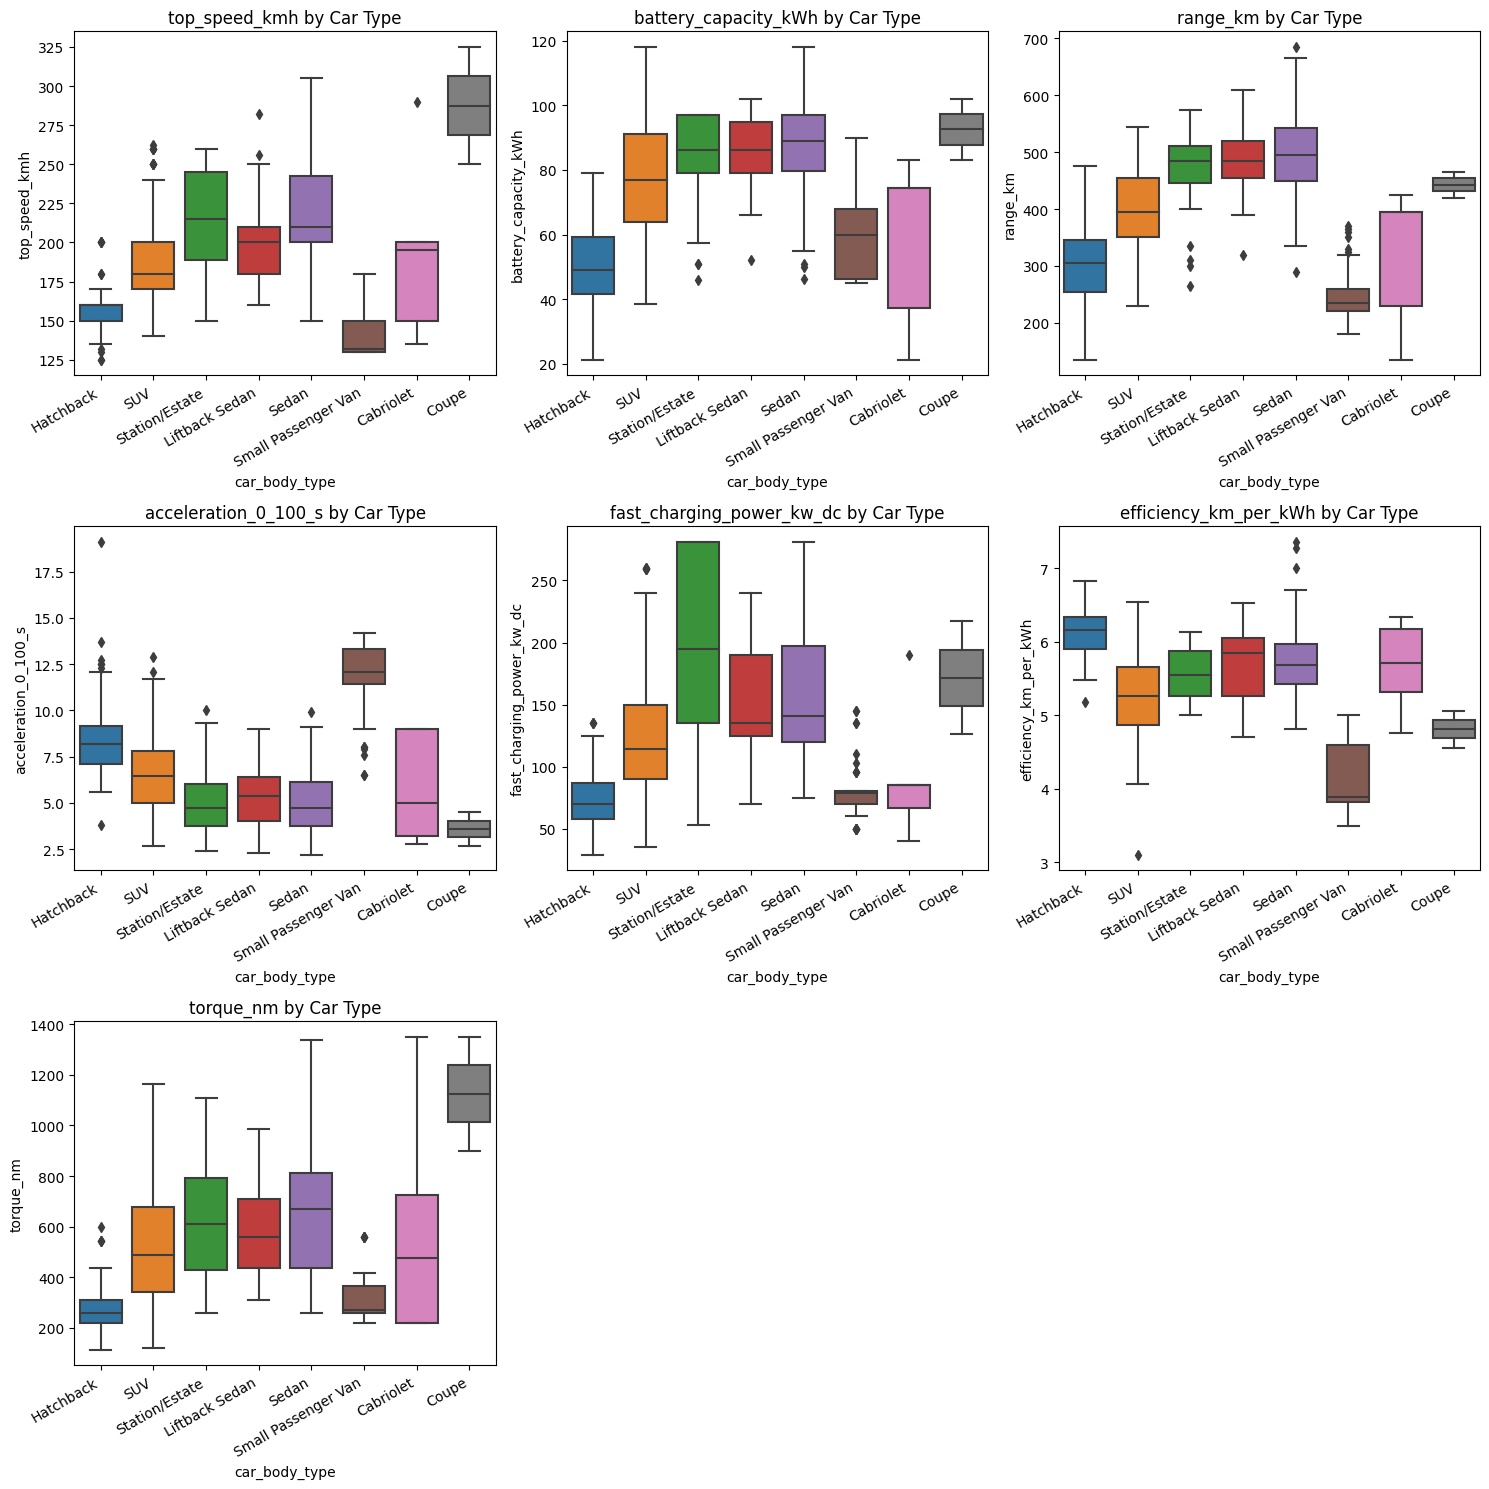

In [13]:
#
plt.figure(figsize=(15,15))
for i, feature in enumerate(num_columns, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(data=df, y = feature, x = 'car_body_type')
    plt.xticks(rotation=30, ha='right')
    plt.title(f'{feature} by Car Type')
plt.tight_layout()

## Observations
- All cars have the same battery type and most have same charging port
- There are high positive correlations with torque -> (Top speed, battery capcity, range, and accelration)
- Efficiency surprisingly had minimal correlations to other features
- Fast cars (coupe) did not sacrafice efficiency nor range
- Overall performance of the vehicle is highly correlated to the battery capacity.